<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/Ejercicios_Bisec_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raíces de ecuaciones no lineales

El propósito de los métodos numéricos para búsqueda de raíces para ecuaciones no lineales es encontrar la raíz - o el valor de la variable independiente, ej. x - que hace que la ecuación  valga cero . La forma general de la búsqueda de raíces para ecuaciones no lineales se puede describir como:

Encontrar una  $x$ tal que
\begin{equation}
f(x) = 0
\end{equation}

Alternativamente, se puede presentar el problema como:

Encontrar una  $x$ tal que 
\begin{equation}
f(x) = a
\end{equation}

Si igualamos la ecuación a 0 forma residual tenemos
\begin{equation}
r(x) \equiv f(x) - a
\end{equation}
y el problema se centra en encontrar una  $x$ tal que 
\begin{equation}
r(x) = 0
\end{equation}


## Método de la Bisección
Quizás es el método de búsqueda de raíz más popular e intuitivo. El método de la bisección funciona  con un intervalo inicial en el que asumimos que existe una raíz (aplicando el teorema de Bolzano) y luego lo reduce sucesivamente  al tomar el punto medio. El algoritmo se puede resumir como:
1. Escogemos el intervalo $[a,  b]$ de manera que la raíz aproximada, $x_0$ cumpla $a \leq x_0 \leq b$
2. Calculamos $c = \frac{a+b}{2}$ como el punto medio entre $a$ y $b$
3. Vemoa en que lado estaría la raíz: si $f(a)\times f(c) < 0$ entonces hacemos $b = c$ si no $a=c$
4. Vemos si existe convergencia y si es necesario repetimos los pasos anteriores


In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


### Ejemplo de implementación del método de la bisecciòn

In [0]:
def bisec(f,a,b,tol, maxiter):
    """
    hola
    """
    err = tol + 100
    niter = 0
    print('{:<12} {:<12} {:<12} {:<12}'.format('Iteración','a','b','error'))
    while err > tol and niter < maxiter:
        niter +=1
        c = (a + b)/2.0
        fc = f(c)
        fa = f(a)
        if (fa * fc < 0.0):
            b = c
        else:
            a = c
        err = abs(fc)
        print('{:<12} {:<12} {:<12} {:<12}'.format(niter, round(a,6), round(b,6), round(err,10)))
    if niter == maxiter:
        print('Iteraciones alcanzadas sin solucion =',niter)
    else:
        print('solución %8.6f' % (c))
        print('alcanzada en %3d iteraciones' % (niter))
        print('valor de la función = %12.10f' % (f(c)))
    return 

####  Ejemplo 1.- Exploremos las raíces de la siguiente ecuación<br>
$
\ln(x) + \cos(x)e^{-0.1x} = 2
$<br><br>
o en forma su lugar<br><br>
$
 res(x) = \ln(x) + \cos(x)e^{-0.1x} - 2 = 0
$<br>

La función tiene tres raices , 5.309, 8.045, and 10.02

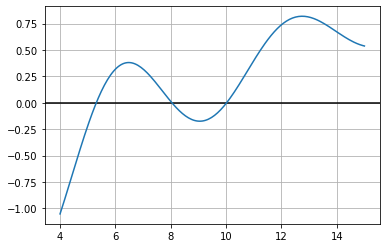

In [0]:
res = lambda x: np.log(x) + np.cos(x)*np.exp(-0.1*x)-2.0
x = np.linspace(4,15,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,res(x))

In [0]:
bisec(res,4,5.5,1e-5,20)

Iteración    a            b            error       
1            4.75         5.5          0.418471165 
2            5.125        5.5          0.1256704432
3            5.125        5.3125       0.0020525841
4            5.21875      5.3125       0.0599408749
5            5.265625     5.3125       0.0284566567
6            5.289062     5.3125       0.0130777303
7            5.300781     5.3125       0.0054812004
8            5.306641     5.3125       0.0017064285
9            5.306641     5.30957      0.0001750523
10           5.308105     5.30957      0.0007651951
11           5.308838     5.30957      0.0002949481
12           5.309204     5.30957      5.99171e-05 
13           5.309204     5.309387     5.75753e-05 
14           5.309296     5.309387     1.169e-06   
solución 5.309296
alcanzada en  14 iteraciones
valor de la función = -0.0000011690


In [0]:
bisec(res,7,9,1e-5,20)

Iteración    a            b            error       
1            8.0          9            0.0140641622
2            8.0          8.5          0.1172427129
3            8.0          8.25         0.0588350441
4            8.0          8.125        0.0238510932
5            8.0          8.0625       0.0052126347
6            8.03125      8.0625       0.0043521038
7            8.03125      8.046875     0.0004494566
8            8.039062     8.046875     0.0019466222
9            8.042969     8.046875     0.0007473954
10           8.044922     8.046875     0.000148671 
11           8.044922     8.045898     0.0001504676
12           8.044922     8.04541      9.17e-07    
solución 8.045410
alcanzada en  12 iteraciones
valor de la función = -0.0000009170


In [0]:
bisec(res,9,11,1e-5,20)

####  Ejemplo 2 .- Encontrar la raiz de <br>
$
f(x) = x^{10} -1
$ en el intervalo  $[0,1.3]$ <br><br>
con una tolerancia del 2% y dibujar la función<br><br>


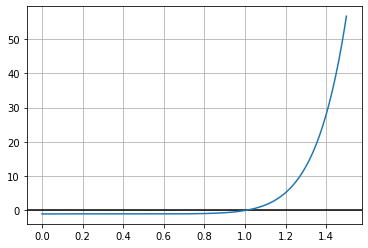

In [0]:
def ejemplo2(x):
    y=x**10 - 1
    return y

x = np.linspace(0,1.5,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,ejemplo2(x))

In [0]:
bisec(ejemplo2,0,1.3,0.02,20)

Iteración    a            b            error       
1            0.65         1.3          0.9865372567
2            0.975        1.3          0.2236703791
3            0.975        1.1375       2.6267202172
4            0.975        1.05625      0.7284913861
5            0.975        1.015625     0.1677068465
6            0.995313     1.015625     0.0458984893
7            0.995313     1.005469     0.0560531409
8            0.995313     1.000391     0.0039131236
solución 1.000391
alcanzada en   8 iteraciones
valor de la función = 0.0039131236


### Ejercicios :
Para cada una de las siguientes funciones (ecuaciones si igualamos a 0), **dibujar la función conteniendo el intervalo de interés para tener una idea de donde estaría la raíz**, obtener la raíz en el intervalo especificado y usar en todos los casos una precisión de $10^{-5}$ y como máximo 50 iteraciones. *Modificar el código de la función "bisec" si queréis imprimir de forma distinta o incluso si queréis haceros vuestro propio código.*


1.- &nbsp;&nbsp;&nbsp;
$
f(x) = e^{-x-0.7} - x -0.7 
$
en el intervalo $[-1,1]$

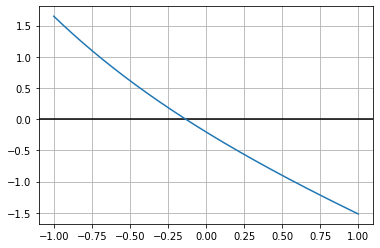

In [0]:
def ejer1(x):
    return np.exp(-x-0.7)-x-0.7 
x = np.linspace(-1,1,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,ejer1(x))

In [0]:
bisec(ejer1,-1,1,1e-5,50)

Iteración    a            b            error       
1            -1           0.0          0.2034146962
2            -0.5         0.0          0.6187307531
3            -0.25        0.0          0.1876281516
4            -0.25        -0.125       0.0122951312
5            -0.1875      -0.125       0.0864962149
6            -0.15625     -0.125       0.0368170388
7            -0.140625    -0.125       0.0121911811
8            -0.140625    -0.132812    6.92822e-05 
9            -0.136719    -0.132812    0.0060566057
10           -0.134766    -0.132812    0.002992578 
11           -0.133789    -0.132812    0.0014613772
12           -0.133301    -0.132812    0.0006959799
13           -0.133057    -0.132812    0.0003133319
14           -0.132935    -0.132812    0.0001220206
15           -0.132874    -0.132812    2.63682e-05 
16           -0.132874    -0.132843    2.14573e-05 
17           -0.132858    -0.132843    2.4554e-06  
solución -0.132858
alcanzada en  17 iteraciones
valor de la func

In [0]:
from scipy.optimize import brentq,newton,fsolve
print('brentq',brentq(ejer1, -1,1))

brentq -0.13285670959021606


2.- &nbsp;&nbsp;&nbsp;
$
f(x) = cos(e^{x})+x
$
en el intervalo $[-1,0]$

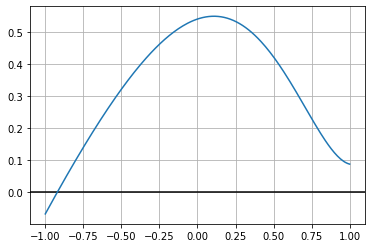

In [0]:
def ejer2(x):
    return np.cos(np.exp(x))+x 
x = np.linspace(-1,1,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,ejer2(x))

In [0]:
bisec(ejer2,-1,0,1e-5,50)

Iteración    a            b            error       
1            -1           -0.5         0.3216305532
2            -1           -0.75        0.1404940133
3            -1           -0.875       0.0393639869
4            -0.9375      -0.875       0.0132025728
5            -0.9375      -0.90625     0.0132315983
6            -0.9375      -0.921875    5.11306e-05 
7            -0.929688    -0.921875    0.0065667014
8            -0.925781    -0.921875    0.0032555137
9            -0.923828    -0.921875    0.0016016215
10           -0.922852    -0.921875    0.0007751027
11           -0.922363    -0.921875    0.0003619503
12           -0.922119    -0.921875    0.0001554009
13           -0.921997    -0.921875    5.21329e-05 
14           -0.921936    -0.921875    5.006e-07   
solución -0.921936
alcanzada en  14 iteraciones
valor de la función = -0.0000005006


In [0]:
from scipy.optimize import brentq,newton,fsolve
print('brentq',brentq(ejer2, -1,0))

brentq -0.9219354434277803


3.- &nbsp;&nbsp;&nbsp;
$
f(x) = 2^{x}(x-6) - x  
$
en el intervalo $[-5,5]$ 

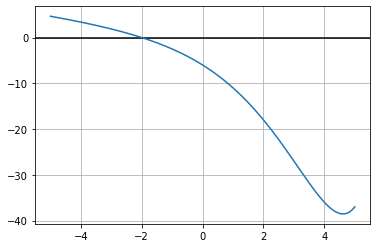

In [0]:
def ejer3(x):
    return 2**(x)*(x-6)-x 
x = np.linspace(-5,5,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,ejer3(x))

In [0]:
bisec(ejer3,-5,5,1e-5,50)

Iteración    a            b            error       
1            -5           0.0          6.0         
2            -2.5         0.0          0.99739809  
3            -2.5         -1.25        1.7982495053
4            -2.5         -1.875       0.2719370987
5            -2.1875      -1.875       0.3900856796
6            -2.03125     -1.875       0.0664607816
7            -2.03125     -1.953125    0.1008189977
8            -2.03125     -1.992188    0.0167085719
9            -2.011719    -1.992188    0.0249925986
10           -2.001953    -1.992188    0.0041712786
11           -2.001953    -1.99707     0.0062613126
12           -2.001953    -1.999512    0.0010431857
13           -2.000732    -1.999512    0.001564504 
14           -2.000122    -1.999512    0.0002607735
15           -2.000122    -1.999817    0.0003911775
16           -2.000122    -1.999969    6.51948e-05 
17           -2.000046    -1.999969    9.77912e-05 
18           -2.000008    -1.999969    1.62986e-05 
19          

4.- &nbsp;&nbsp;&nbsp;
$
f(x) = \sin(3x) -\cos(2x)-1
$
en el intervalo $[-8,-1]$

5.- &nbsp;&nbsp;&nbsp;
$
f(x) = \frac {e^{x}}{x-3}+2x
$
en el intervalo $[1,2]$

6.- &nbsp;&nbsp;&nbsp;
$
f(x) = x^{-2}-\tan(x)
$
en el intervalo $[3,4]$

7.- &nbsp;&nbsp;&nbsp;
$
f(x) = x^{3}-4x\cos(x)+(2\sin(x))^{2}-3
$
en los intervalos $[-2,-1],[-1,0], y [1,2]$

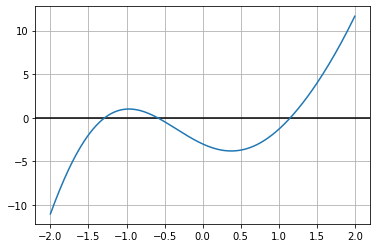

In [0]:
def ejer7(x):
    return x**3-4*x*np.cos(x)+(2*np.sin(x))**2-3 
x = np.linspace(-2,2,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,ejer7(x))

In [0]:
bisec(ejer7,-2,-1,1e-5,50)

Iteración    a            b            error       
1            -1.5         -1           1.9705917968
2            -1.5         -1.25        0.2257740431
3            -1.375       -1.25        0.6809922238
4            -1.3125      -1.25        0.180944689 
5            -1.3125      -1.28125     0.0338941181
6            -1.296875    -1.28125     0.070630442 
7            -1.289062    -1.28125     0.0176474722
8            -1.289062    -1.285156    0.0083031088
9            -1.287109    -1.285156    0.0046271865
10           -1.287109    -1.286133    0.0018492039
11           -1.286621    -1.286133    0.0013861799
12           -1.286621    -1.286377    0.0002322148
13           -1.286499    -1.286377    0.0005768068
14           -1.286438    -1.286377    0.0001722521
15           -1.286438    -1.286407    2.99923e-05 
16           -1.286423    -1.286407    7.11271e-05 
17           -1.286415    -1.286407    2.05667e-05 
18           -1.286415    -1.286411    4.713e-06   
solución -1.

In [0]:
bisec(ejer7,-1,0,1e-5,50)

Iteración    a            b            error       
1            -1           -0.5         0.450439488 
2            -0.75        -0.5         0.6317172033
3            -0.625       -0.5         0.152622449 
4            -0.625       -0.5625      0.137001426 
5            -0.59375     -0.5625      0.0112358281
6            -0.59375     -0.578125    0.062082637 
7            -0.59375     -0.585938    0.0252163463
8            -0.59375     -0.589844    0.006937617 
9            -0.591797    -0.589844    0.0021623758
10           -0.591797    -0.59082     0.0023843168
11           -0.591797    -0.591309    0.0001101428
12           -0.591553    -0.591309    0.0010263236
13           -0.591431    -0.591309    0.0004581422
14           -0.59137     -0.591309    0.0001740126
15           -0.591339    -0.591309    3.19381e-05 
16           -0.591339    -0.591324    3.91015e-05 
17           -0.591339    -0.591331    3.5815e-06  
solución -0.591331
alcanzada en  17 iteraciones
valor de la func

In [0]:
bisec(ejer7,1,2,1e-5,50)

Iteración    a            b            error       
1            1            1.5          3.9305617832
2            1            1.25         0.9788004191
3            1.125        1.25         0.2601189551
4            1.125        1.1875       0.3387142434
5            1.125        1.15625      0.034063864 
6            1.140625     1.15625      0.1143459362
7            1.148438     1.15625      0.0404693791
8            1.152344     1.15625      0.0032846874
9            1.152344     1.154297     0.0153691253
10           1.152344     1.15332      0.0060371007
11           1.152344     1.152832     0.0013749268
12           1.152588     1.152832     0.0009552003
13           1.152588     1.15271      0.0002097833
14           1.152649     1.15271      0.0003727285
15           1.152679     1.15271      8.14776e-05 
16           1.152679     1.152695     6.41516e-05 
17           1.152687     1.152695     8.6633e-06  
solución 1.152687
alcanzada en  17 iteraciones
valor de la funci